In [27]:
import glob

import pandas as pd

import seaborn as sns

from tqdm import tqdm

tqdm.pandas()

In [32]:
data_base_dir = "data/by_date"

dates = []
dfs = {}
for fpath in glob.glob(data_base_dir + "/*"):
    df = pd.read_csv(fpath)
    date = df["date"].iloc[0]
    dfs[date] = df#[df["question"].notnull()]
    dates.append(date)

dates.sort()

In [33]:
df = pd.concat(dfs)
df

speaker  \
1984-10-07 0    Dorothy Ridings   
           1    Barbara Walters   
           2     James Wieghart   
           3     James Wieghart   
           4     James Wieghart   
...                         ...   
2004-09-30 137       Jim Lehrer   
           138       John Kerry   
           139       Jim Lehrer   
           140   George W. Bush   
           141       Jim Lehrer   

                                                             text  type  \
1984-10-07 0    Good evening from the Kentucky Center for the ...  Pres   
           1    Thank you, Dorothy. A few words as we begin to...  Pres   
           2    Mr. President, in 1980 you promised the Americ...  Pres   
           3    Mr. President, the Congressional Budget Office...  Pres   
           4    Mr. Mondale, the Carter- Mondale administratio...  Pres   
...                                                           ...   ...   
2004-09-30 137  All right, that brings us to closing statement...  Pres   
           138  Thank you, Jim, very much. Thank you very much...  Pres   
           139                        Mr. President, two minutes.  Pres   
           140  Thank you very much tonight, Jim. Senator. If ...  Pres   
           141  And that ends tonights debate. A reminder, the...  Pres   

                election_year        date  candidate  qud question  \
1984-10-07 0             1984  1984-10-07          0  NaN      NaN   
           1             1984  1984-10-07          0  NaN      NaN   
           2             1984  1984-10-07          0  NaN      NaN   
           3             1984  1984-10-07          0  NaN      NaN   
           4             1984  1984-10-07          0  NaN      NaN   
...                       ...         ...        ...  ...      ...   
2004-09-30 137           2004  2004-09-30          0  NaN      NaN   
           138           2004  2004-09-30          1  NaN      NaN   
           139           2004  2004-09-30          0  NaN      NaN   
           140           2004  2004-09-30          1  NaN      NaN   
           141           2004  2004-09-30          0  NaN      NaN   

                similarity_cls  similarity_max  similarity_mean  \
1984-10-07 0               NaN             NaN              NaN   
           1               NaN             NaN              NaN   
           2               NaN             NaN              NaN   
           3               NaN             NaN              NaN   
           4               NaN             NaN              NaN   
...                        ...             ...              ...   
2004-09-30 137             NaN             NaN              NaN   
           138             NaN             NaN              NaN   
           139             NaN             NaN              NaN   
           140             NaN             NaN              NaN   
           141             NaN             NaN              NaN   

                similarity_sbert  
1984-10-07 0                 NaN  
           1                 NaN  
           2                 NaN  
           3                 NaN  
           4                 NaN  
...                          ...  
2004-09-30 137               NaN  
           138               NaN  
           139               NaN  
           140               NaN  
           141               NaN  

[2716 rows x 12 columns]

In [34]:
for i, d in enumerate(dates):
    print(f"{i}\t{d}\t{len(dfs[d])}\t{len(dfs[d].columns)}")

0	1960-09-26	68	12
1	1976-09-23	94	12
2	1980-09-21	76	12
3	1984-10-07	134	12
4	1988-09-25	161	12
5	1992-10-11	92	12
6	1996-10-06	144	12
7	2000-10-03	166	12
8	2004-09-30	142	12
9	2008-09-26	189	12
10	2012-10-03	210	12
11	2016-09-26	308	12
12	2020-09-29	932	12


In [37]:
for i, d in enumerate(dates):
    df_f = dfs[d][dfs[d]["question"].notnull()]
    print(f"{i}\t{d}\t{len(df_f)}\t{len(df_f.columns)}")

0	1960-09-26	10	12
1	1976-09-23	20	12
2	1980-09-21	12	12
3	1984-10-07	30	12
4	1988-09-25	23	12
5	1992-10-11	11	12
6	1996-10-06	21	12
7	2000-10-03	26	12
8	2004-09-30	18	12
9	2008-09-26	17	12
10	2012-10-03	25	12
11	2016-09-26	19	12
12	2020-09-29	39	12


In [35]:
df_melted = pd.melt(
    df,
    id_vars=[
        col
        for col in df.columns
        if col
        not in [
            "similarity_cls",
            "similarity_mean",
            "similarity_max",
            "similarity_sbert",
        ]
    ],
    var_name="measure",
    value_name="similarity",
)
df_melted

,speaker,text,type,election_year,date,candidate,qud,question,measure,similarity
0,Dorothy Ridings,Good evening from the Kentucky Center for the ...,Pres,1984,1984-10-07,0,NaN,NaN,similarity_cls,NaN
1,Barbara Walters,"Thank you, Dorothy. A few words as we begin to...",Pres,1984,1984-10-07,0,NaN,NaN,similarity_cls,NaN
2,James Wieghart,"Mr. President, in 1980 you promised the Americ...",Pres,1984,1984-10-07,0,NaN,NaN,similarity_cls,NaN
3,James Wieghart,"Mr. President, the Congressional Budget Office...",Pres,1984,1984-10-07,0,NaN,NaN,similarity_cls,NaN
4,James Wieghart,"Mr. Mondale, the Carter- Mondale administratio...",Pres,1984,1984-10-07,0,NaN,NaN,similarity_cls,NaN
...,...,...,...,...,...,...,...,...,...,...
10859,Jim Lehrer,"All right, that brings us to closing statement...",Pres,2004,2004-09-30,0,NaN,NaN,similarity_sbert,NaN
10860,John Kerry,"Thank you, Jim, very much. Thank you very much...",Pres,2004,2004-09-30,1,NaN,NaN,similarity_sbert,NaN
10861,Jim Lehrer,"Mr. President, two minutes.",Pres,2004,2004-09-30,0,NaN,NaN,similarity_sbert,NaN
10862,George W. Bush,"Thank you very much tonight, Jim. Senator. If ...",Pres,2004,2004-09-30,1,NaN,NaN,similarity_sbert,NaN


<Axes: xlabel='date', ylabel='similarity'>

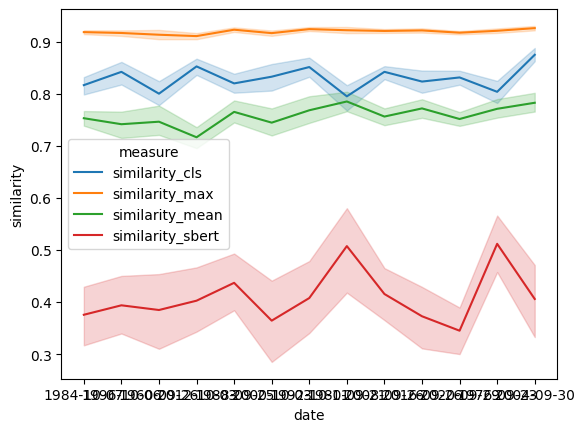

In [36]:
sns.lineplot(data=df_melted, x="date", y="similarity", hue="measure")